# ІЄРАРХІЧНІ МЕТОДИ КЛАСТЕРНОГО АНАЛІЗУ

3. Завантажити висхідний набір даних для обробки та аналізу згідно до вашого варіанту (табл. 4.2). Побудувати графічне зображення експериментальних даних.
4. Обчислити відстань між об'єктами. Використовувати міри для розрахунку відстаней відповідно до варіанту (табл. 4.2).
5. Використовуючи рекомендоване програмне забезпечення здійснити кластерний аналіз висхідних данних методом ієрархічної кластерізації за методами зв'язування відповідно до варіанту (табл. 4.2).
6. Виконати аналіз якості кластерізації за допомогою обчислення кофенетичного корреляційного коеффіцієнту. Заповнити таблицю для кофенетичного корреляційного коеффіцієнту (табл. 4.1).
7. Визначити найбільш і найменш ефективні способи ієрархічної кластерізації для аналізу висхідного набору данних (максимальні і мінімальні коефіцієнти та відповідні до них спосои кластерізації). Для найбільш ефективного способу ієрархічної кластерізації побудувати дендрограму результатів кластерного аналізу.
8. Визначити кількість вірогідних кластерів. Для виділення значущих кластерів використовувати порогове значення, розраховане за метрикою відстаней або методом завдання фіксованого числа кластерів.
9. Розрахувати центри та внутрішньокластерну дисперсію отриманих кластерів, геометричні відстані від елементів до центрів кластерів, відстані між центрами кластерів. Відобразити графічно знайдені кластери та ії центри (скористатися діаграмою розсіювання у кольорі).

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

## LOAD DATA

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Columns explanation

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance


## DATA PREPARATION

In [5]:
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

In [6]:
df['charges'] = (df.charges.round()//1000).astype(int)

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16
1,18,male,33.770,1,0,southeast,1
2,28,male,33.000,3,0,southeast,4
3,33,male,22.705,0,0,northwest,21
4,32,male,28.880,0,0,northwest,3
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10
1334,18,female,31.920,0,0,northeast,2
1335,18,female,36.850,0,0,southeast,1
1336,21,female,25.800,0,0,southwest,2


In [8]:
df.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,12.773543
std,14.049960,6.098187,1.205493,0.403694,12.112610
min,18.000000,15.960000,0.000000,0.000000,1.000000
25%,27.000000,26.296250,0.000000,0.000000,4.000000
50%,39.000000,30.400000,1.000000,0.000000,9.000000
75%,51.000000,34.693750,2.000000,0.000000,16.000000
max,64.000000,53.130000,5.000000,1.000000,63.000000


In [9]:
df.isnull().any().any()

False

## DATA VISUALIZATION

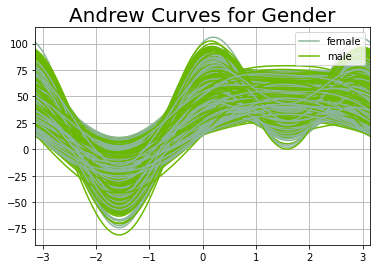

In [10]:
from pandas import plotting
# plt.rcParams['figure.figsize'] = (15, 10)


plotting.andrews_curves(df.drop(['region'],axis=1), "sex")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

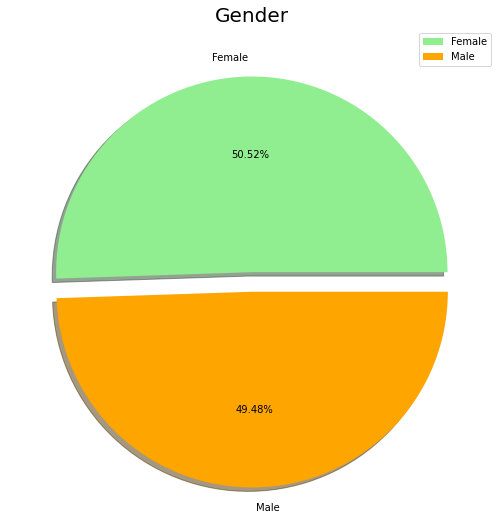

In [11]:


labels = ['Female', 'Male']
size = df['sex'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()



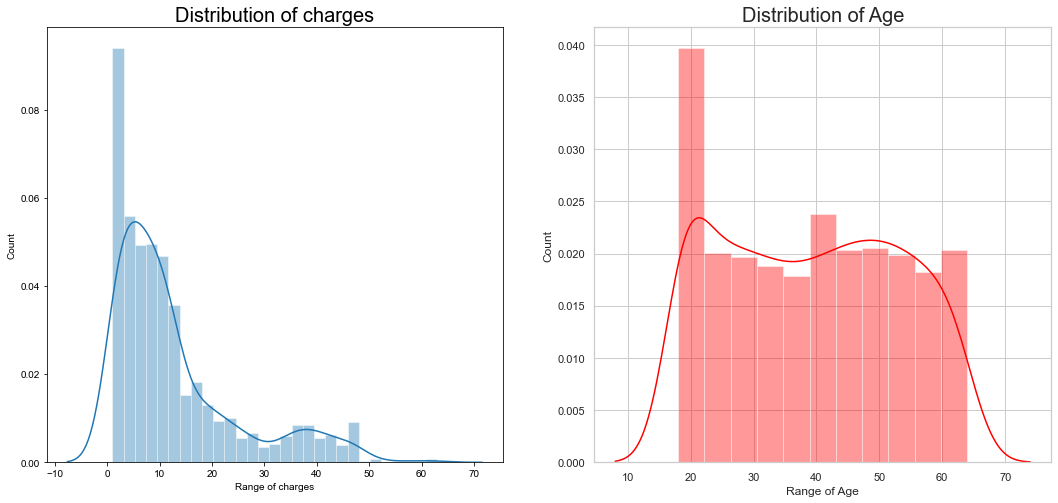

In [12]:


import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['charges'])
plt.title('Distribution of charges', fontsize = 20)
plt.xlabel('Range of charges')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()



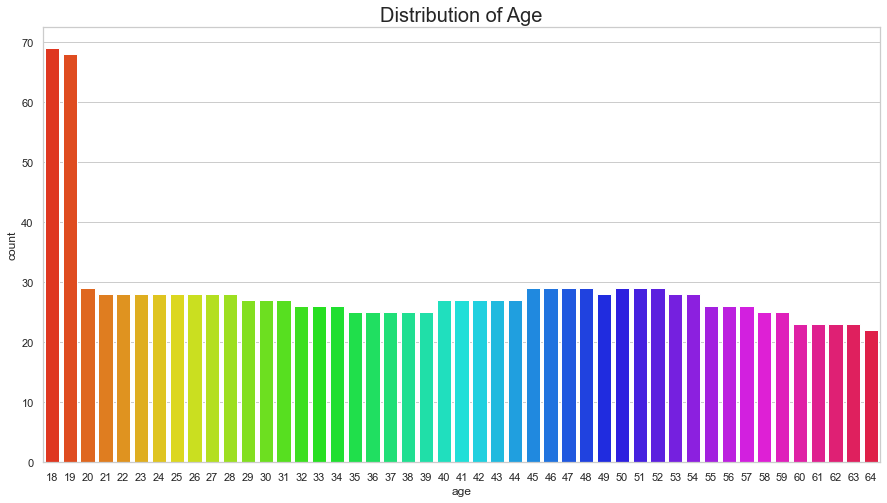

In [13]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

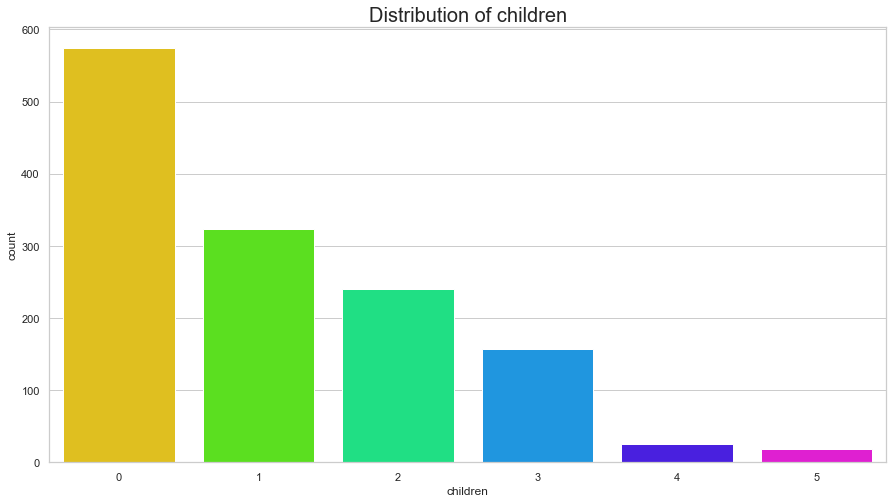

In [14]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['children'], palette = 'hsv')
plt.title('Distribution of children', fontsize = 20)
plt.show()

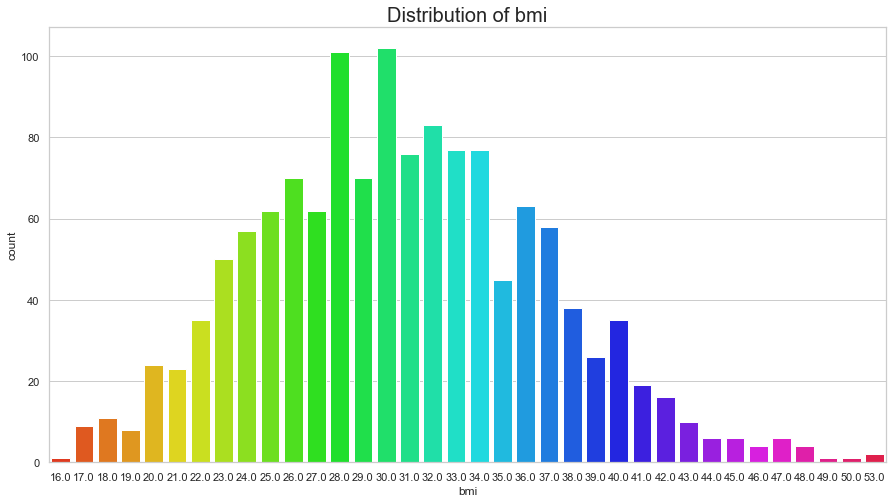

In [15]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['bmi'].round(0), palette = 'hsv')
plt.title('Distribution of bmi', fontsize = 20)
plt.show()

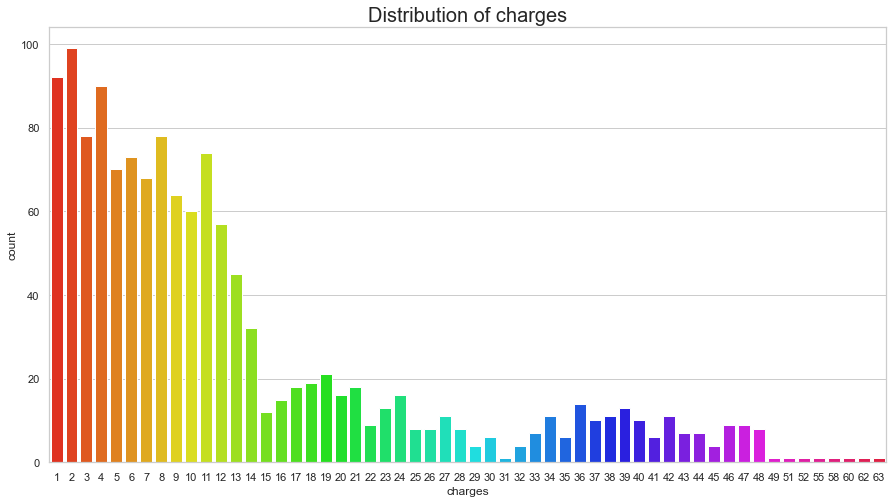

In [16]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['charges'].round(0), palette = 'hsv')
plt.title('Distribution of charges', fontsize = 20)
plt.show()

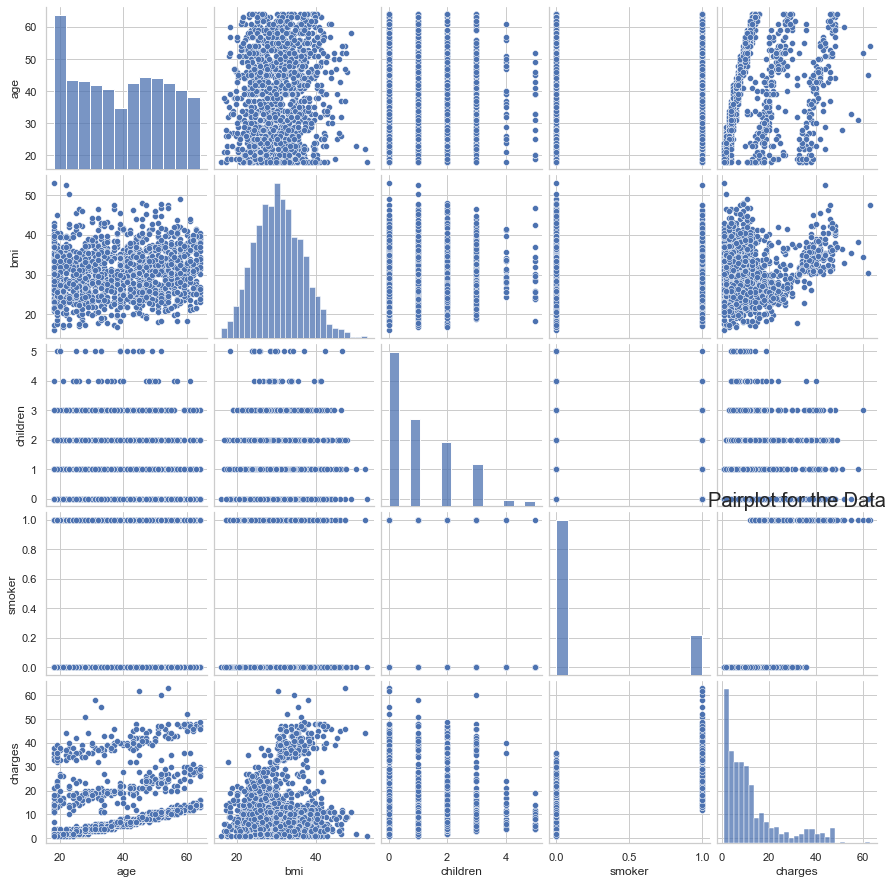

In [17]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

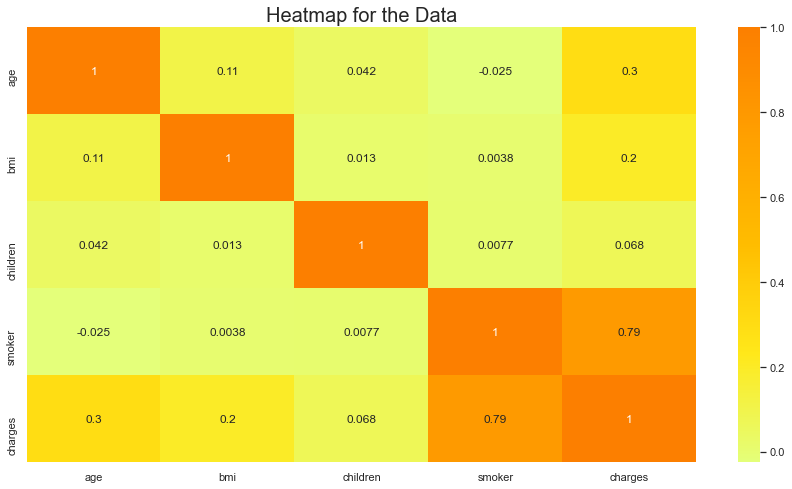

In [18]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

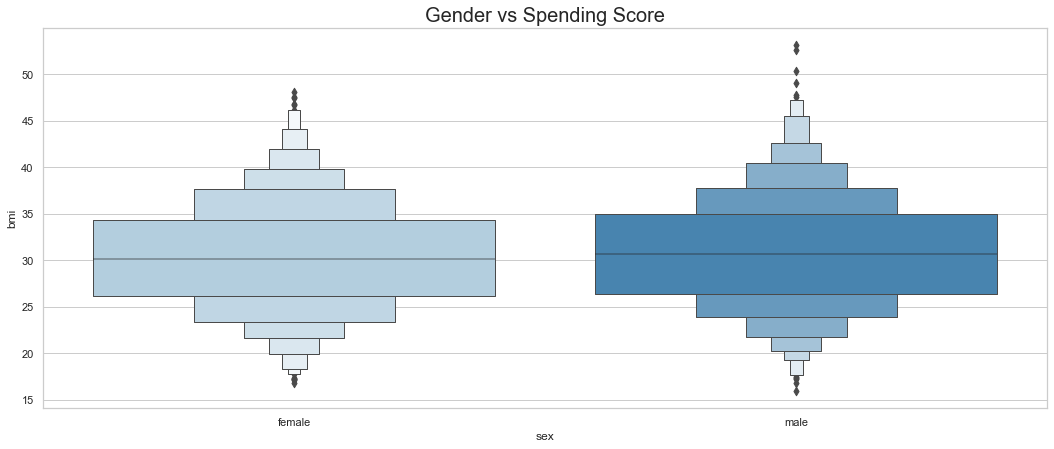

In [19]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['sex'], df['bmi'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()



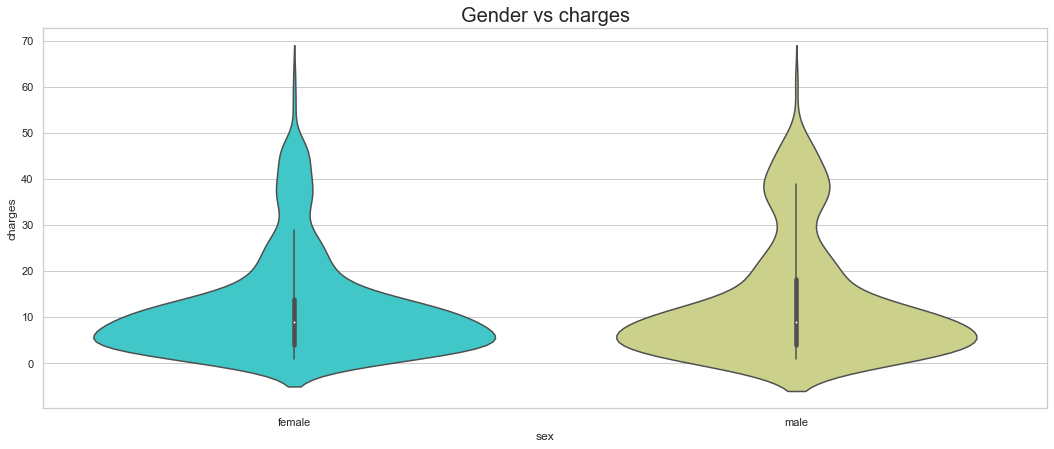

In [20]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['sex'], df['charges'], palette = 'rainbow')
plt.title('Gender vs charges', fontsize = 20)
plt.show()

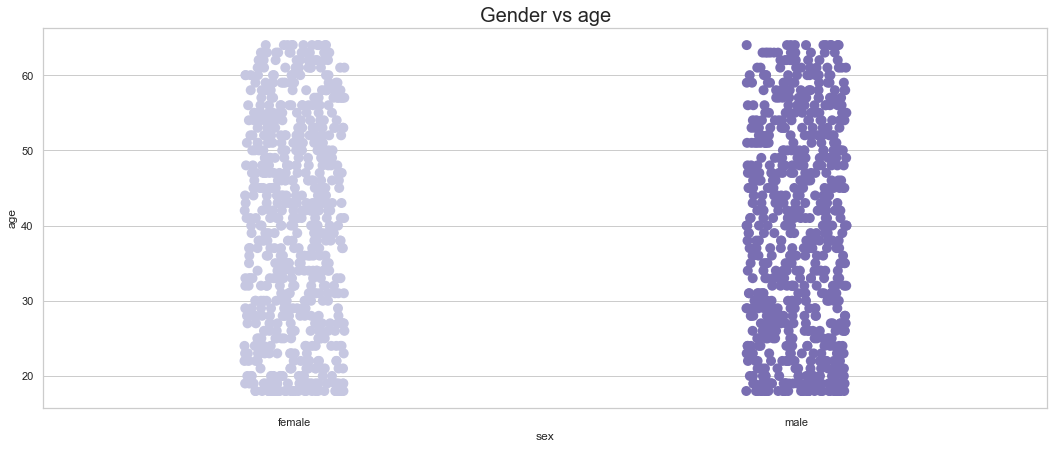

In [21]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df['sex'], df['age'], palette = 'Purples', size = 10)
plt.title('Gender vs age', fontsize = 20)
plt.show()

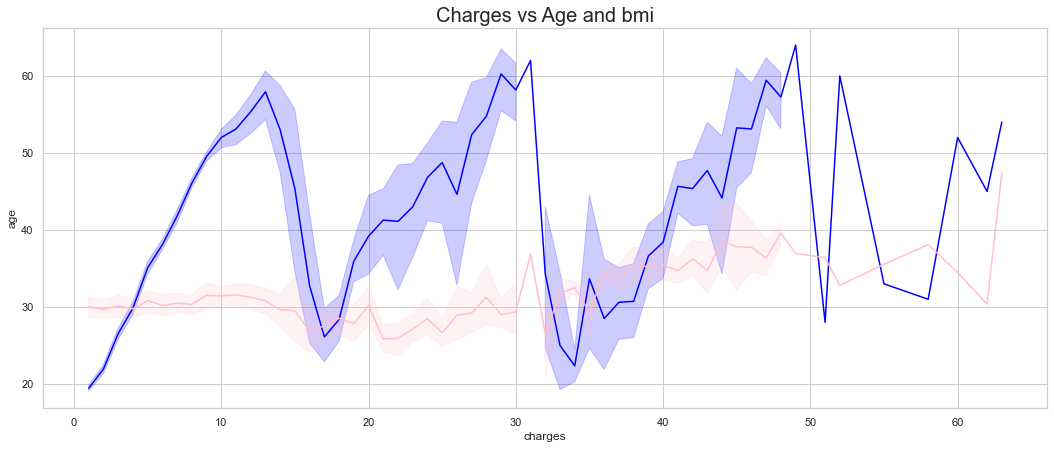

In [22]:
x = df['charges']
y = df['age']
z = df['bmi']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Charges vs Age and bmi', fontsize = 20)
plt.show()

## CLUSTERING DATA


In [23]:
x = df.iloc[:, [0, 2]].values

# let's check the shape of x
print(x.shape)

(1338, 2)


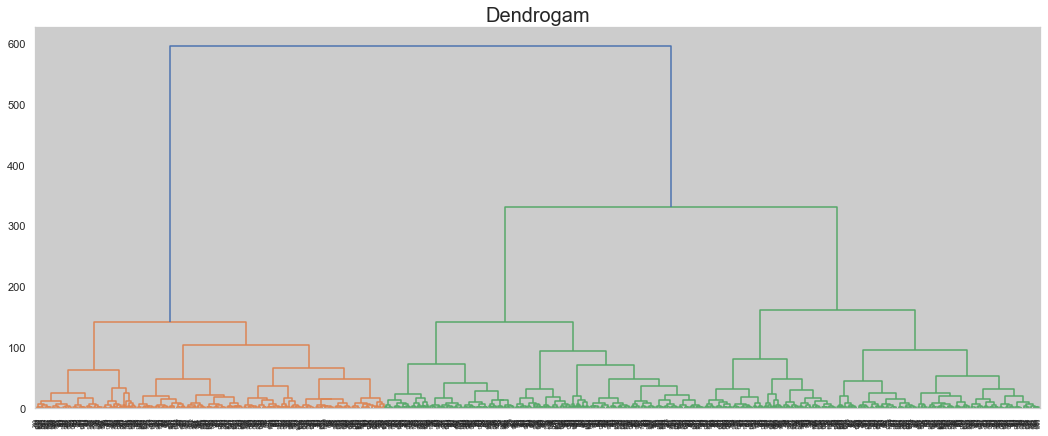

In [25]:

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

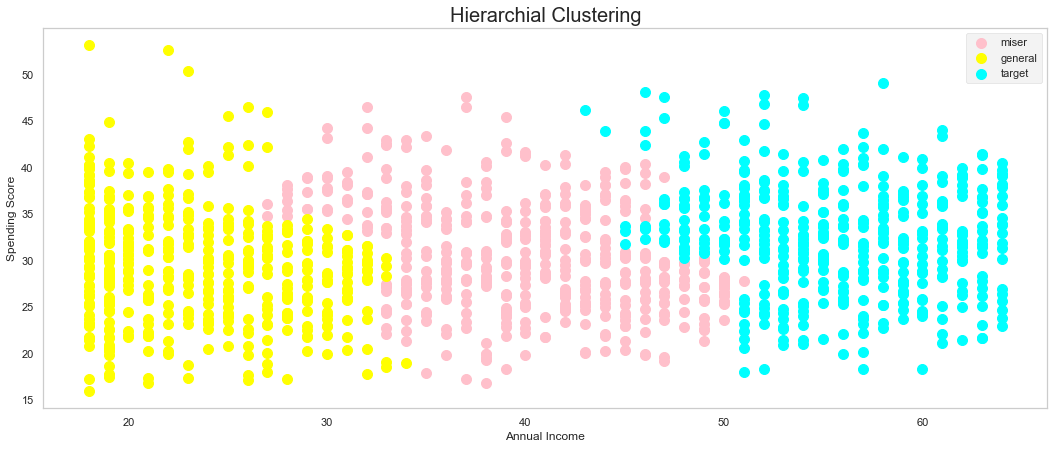

In [27]:


from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

